## Data Exploration

## Purpose:
 Initial exploration of the raw data (understanding data format, distributions, missing values, outliers, etc.).


Imports and Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



Load Raw Data

Demonstrate loading the Excel file (or CSV files, if already split).

In [3]:
raw_data_path = "../data/raw/data_task.xlsx"
df_orders = pd.read_excel(raw_data_path, sheet_name="order_numbers")
df_transactions = pd.read_excel(raw_data_path, sheet_name="transaction_data")
df_reported = pd.read_excel(raw_data_path, sheet_name="reported_data")

df_orders.head()



,date,order_number
0,2018-01-07,33841906
1,2018-01-22,34008921
2,2018-01-25,34397468
3,2018-02-06,34434432
4,2018-02-08,34579365


Exploratory Analysis

Shape, column info, missing values, data types, etc.

In [4]:
print("Orders Shape:", df_orders.shape)
print(df_orders.info())
print(df_orders.describe())


Orders Shape: (856, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          856 non-null    datetime64[ns]
 1   order_number  856 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.5 KB
None
                                date  order_number
count                            856  8.560000e+02
mean   2020-11-03 20:29:43.177570304  6.118115e+07
min              2018-01-07 00:00:00  8.028800e+04
25%              2019-10-21 12:00:00  4.816847e+07
50%              2020-11-27 00:00:00  6.120493e+07
75%              2021-12-18 06:00:00  7.517348e+07
max              2022-12-30 00:00:00  8.917258e+07
std                              NaN  1.752091e+07


In [6]:
# Check for missing values
print("\nMissing values in df_orders:")
print(df_orders.isnull().sum())

# Check duplicates
print("\nDuplicates in df_orders:", df_orders.duplicated().sum())



Missing values in df_orders:
date            0
order_number    0
dtype: int64

Duplicates in df_orders: 0


Visual Explorations

Histograms, boxplots, correlation, etc.

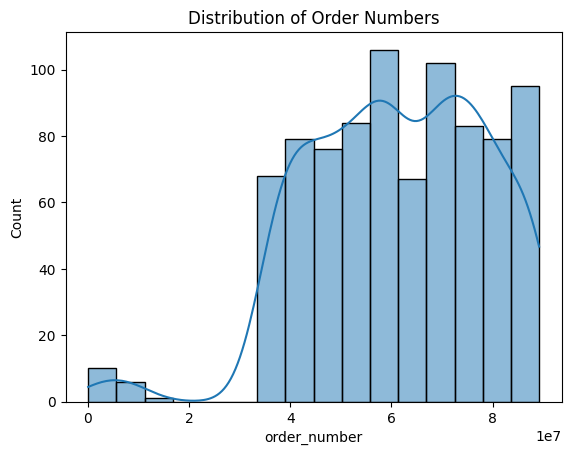

In [7]:
sns.histplot(df_orders['order_number'], kde=True)
plt.title("Distribution of Order Numbers")
plt.show()


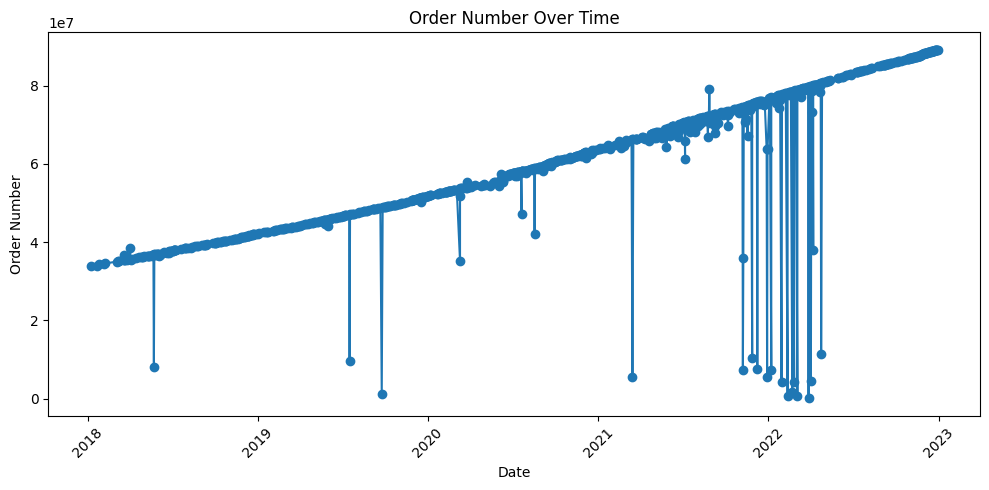

In [10]:
# Convert 'date' to datetime if not already
df_orders["date"] = pd.to_datetime(df_orders["date"])

plt.figure(figsize=(10,5))
plt.plot(df_orders["date"], df_orders["order_number"], marker='o', linestyle='-')
plt.title("Order Number Over Time")
plt.xlabel("Date")
plt.ylabel("Order Number")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



print("df_transactions Shape:", df_transactions.shape)
print(df_transactions.info())
display(df_transactions.describe())


Distribution of Index Columns




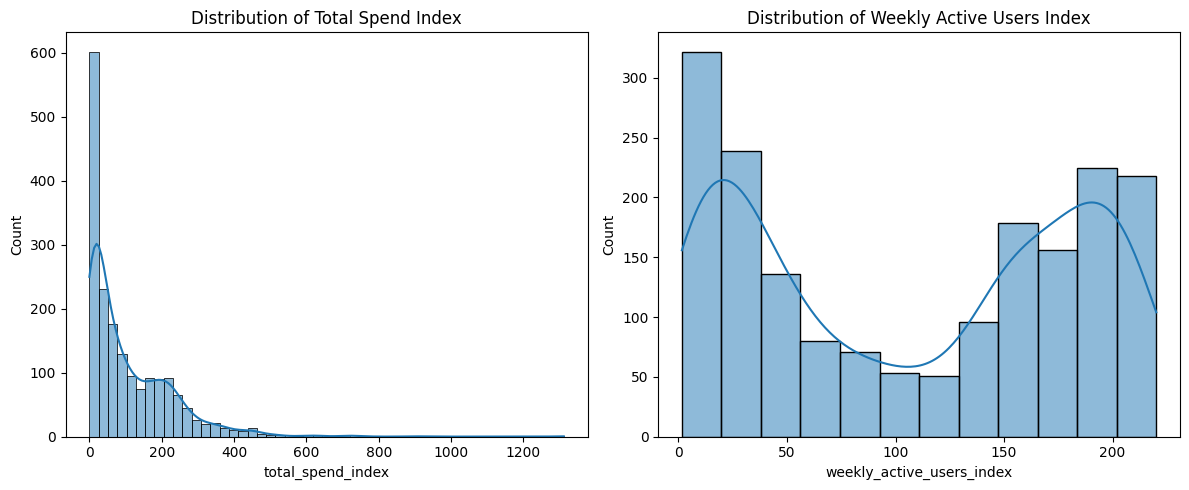

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_transactions["total_spend_index"], kde=True, ax=axes[0])
axes[0].set_title("Distribution of Total Spend Index")

sns.histplot(df_transactions["weekly_active_users_index"], kde=True, ax=axes[1])
axes[1].set_title("Distribution of Weekly Active Users Index")

plt.tight_layout()
plt.show()


Time Series Trends


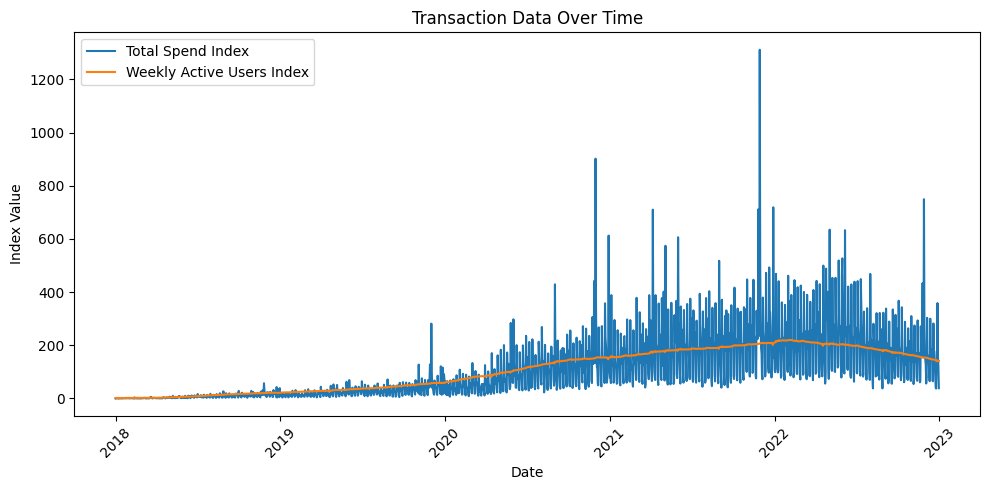

In [13]:
# Convert 'date' to datetime if not already
df_transactions["date"] = pd.to_datetime(df_transactions["date"])

plt.figure(figsize=(10,5))
plt.plot(df_transactions["date"], df_transactions["total_spend_index"], label="Total Spend Index")
plt.plot(df_transactions["date"], df_transactions["weekly_active_users_index"], label="Weekly Active Users Index")
plt.title("Transaction Data Over Time")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


                           total_spend_index  weekly_active_users_index
total_spend_index                   1.000000                   0.716305
weekly_active_users_index           0.716305                   1.000000


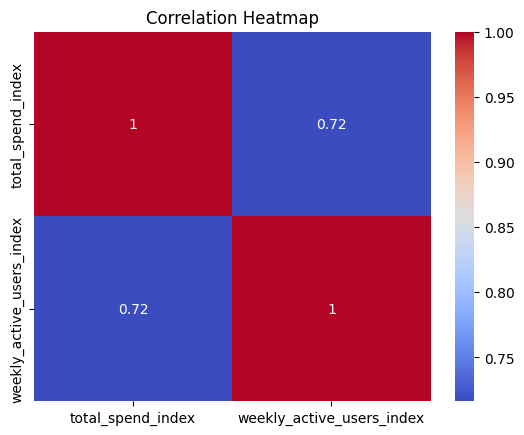

In [14]:
correlation = df_transactions[["total_spend_index", "weekly_active_users_index"]].corr()
print(correlation)

sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


exploring reported_Data

In [15]:
print("df_reported Shape:", df_reported.shape)
print(df_reported.info())
display(df_reported.describe())


df_reported Shape: (20, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   period         20 non-null     object        
 1   start_date     20 non-null     datetime64[ns]
 2   end_date       20 non-null     datetime64[ns]
 3   revenue_index  20 non-null     float64       
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 768.0+ bytes
None


,start_date,end_date,revenue_index
count,20,20,20.000000
mean,2020-04-29 19:12:00,2020-07-29 02:24:00,291.340869
min,2018-01-01 00:00:00,2018-02-28 00:00:00,100.000000
25%,2019-02-14 06:00:00,2019-05-30 12:00:00,201.738556
50%,2020-05-01 00:00:00,2020-07-31 00:00:00,271.654930
75%,2021-07-16 12:00:00,2021-09-30 12:00:00,372.243807
max,2022-09-01 00:00:00,2022-12-31 00:00:00,552.442986
std,NaN,NaN,136.115147


missing values check


In [16]:
df_reported.isna().sum()


period           0
start_date       0
end_date         0
revenue_index    0
dtype: int64

distribution of revenue_index

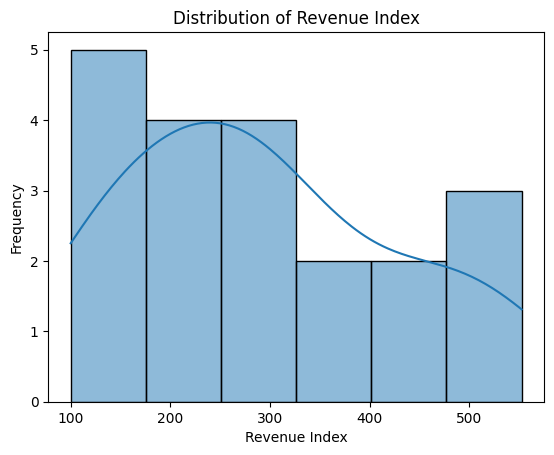

In [17]:
sns.histplot(df_reported["revenue_index"], kde=True)
plt.title("Distribution of Revenue Index")
plt.xlabel("Revenue Index")
plt.ylabel("Frequency")
plt.show()


relationship over time

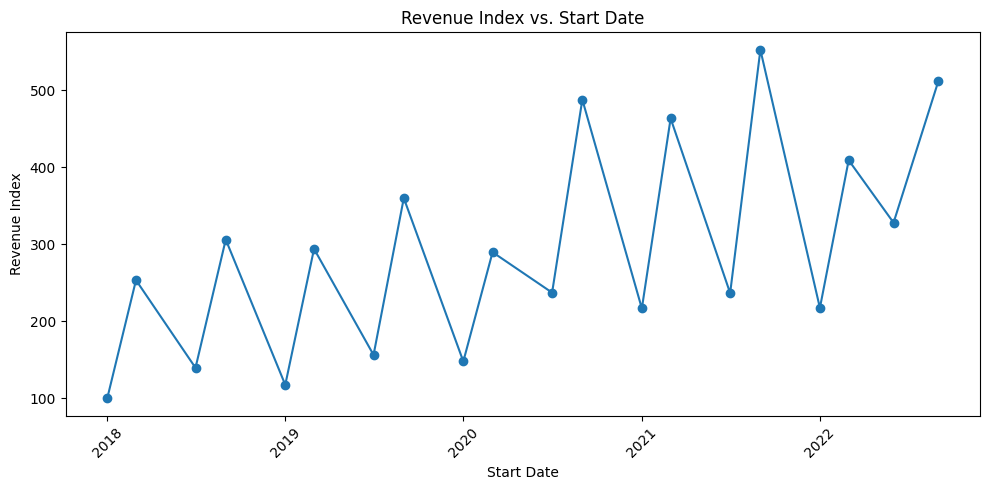

In [18]:
df_reported["start_date"] = pd.to_datetime(df_reported["start_date"])
df_reported["end_date"] = pd.to_datetime(df_reported["end_date"])

# For a time-series like view, let's plot revenue_index by start_date
plt.figure(figsize=(10,5))
plt.plot(df_reported["start_date"], df_reported["revenue_index"], marker='o')
plt.title("Revenue Index vs. Start Date")
plt.xlabel("Start Date")
plt.ylabel("Revenue Index")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Summary Observations


Orders Dataset:

The dataset contains 856 rows and 2 columns (date, order_number).
No missing values were identified in this dataset.
The order_number column exhibits a roughly normal distribution with slight variations.
A general upward trend in the number of orders is observed over time, with occasional sharp drops that may indicate errors or specific events.
Transactions Dataset:

This dataset shows significant growth in both total_spend_index and weekly_active_users_index over time.
A positive correlation of approximately 0.72 was identified between these two indices, indicating that an increase in active users often coincides with an increase in total spending.
This relationship is key for understanding user behavior and revenue generation.
Reported Data (Revenue Dataset):

The dataset includes only 20 rows and 4 columns (period, start_date, end_date, revenue_index).
No missing values are present in this dataset.
The revenue_index distribution is slightly right-skewed, with values concentrated at lower ranges.
A clear upward trend in revenue is observed across the analyzed periods.


Overall:


The data in all three datasets is well-structured, with no significant inconsistencies or missing values.
Positive correlations and time-series trends suggest strong relationships between user activity, spending, and revenue, 